<a href="https://colab.research.google.com/github/reza-pishva/6-MachineLearning-Python/blob/main/cnn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [4]:
data_dir = './drive/MyDrive/dataset'

In [5]:
image_exts = ['jpeg','jpg','bmp','png']

In [6]:
image_exts[0]

'jpeg'

In [ ]:
# os.listdir(os.path.join(data_dir,'sad'))

In [ ]:
# for image_class in os.listdir(data_dir):
#   for image in os.listdir(os.path.join(data_dir,image_class)):
#     print(image)

In [7]:
# for image_class in os.listdir(data_dir):
#   for image in os.listdir(os.path.join(data_dir,image_class)):
#     image_path = os.path.join(data_dir,image_class,image)
#     try:
#         image = cv2.imread(image_path)
#         tip = imghdr.what(image_path)
#         if tip not in image_exts:
#           print('image not in ext list {}'.format(image_path))
#           os.remove(image_path)
#     except Exception as e:
#       print('issue with image {}'.format(image_path))

array([[[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [134, 143, 216],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [135, 144, 217],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [134, 146, 218],
        [133, 145, 217],
        [133, 145, 217]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   2,   0],
        [  3,   1,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  0,   2,   0]]], dtype=uint8)
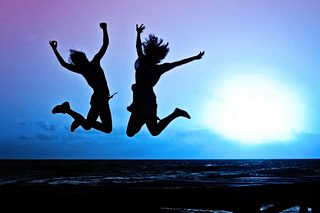

In [8]:
cv2.imread(os.path.join(data_dir,'happy','_happy_jumping_on_beach-40815.jpg'))

array([[[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [134, 143, 216],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [135, 144, 217],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [134, 146, 218],
        [133, 145, 217],
        [133, 145, 217]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   2,   0],
        [  3,   1,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  0,   2,   0]]], dtype=uint8)
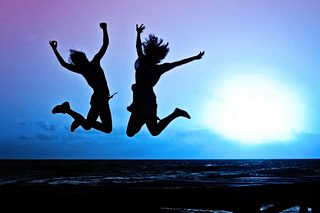

In [9]:
img = cv2.imread(os.path.join(data_dir,'happy','_happy_jumping_on_beach-40815.jpg'))
img

In [10]:
img.shape

(213, 320, 3)

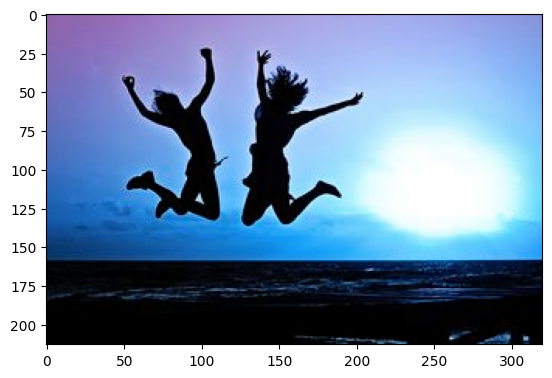

In [11]:
plt.imshow(img)

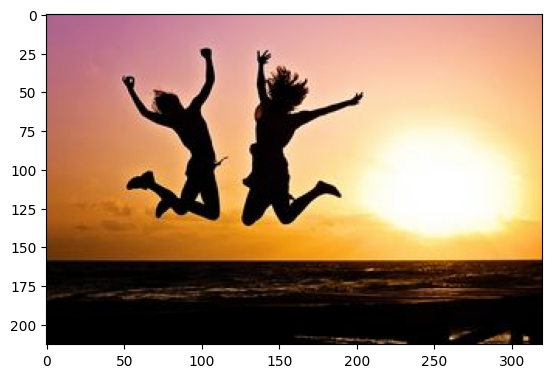

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
import numpy as np

In [17]:
# tf.keras.utils.image_dataset_from_directory??

In [18]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data

Found 1118 files belonging to 3 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [ ]:
# batch

In [20]:
len(batch)

2

In [21]:
batch[1]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int32)

In [22]:
batch[0].shape

(32, 256, 256, 3)

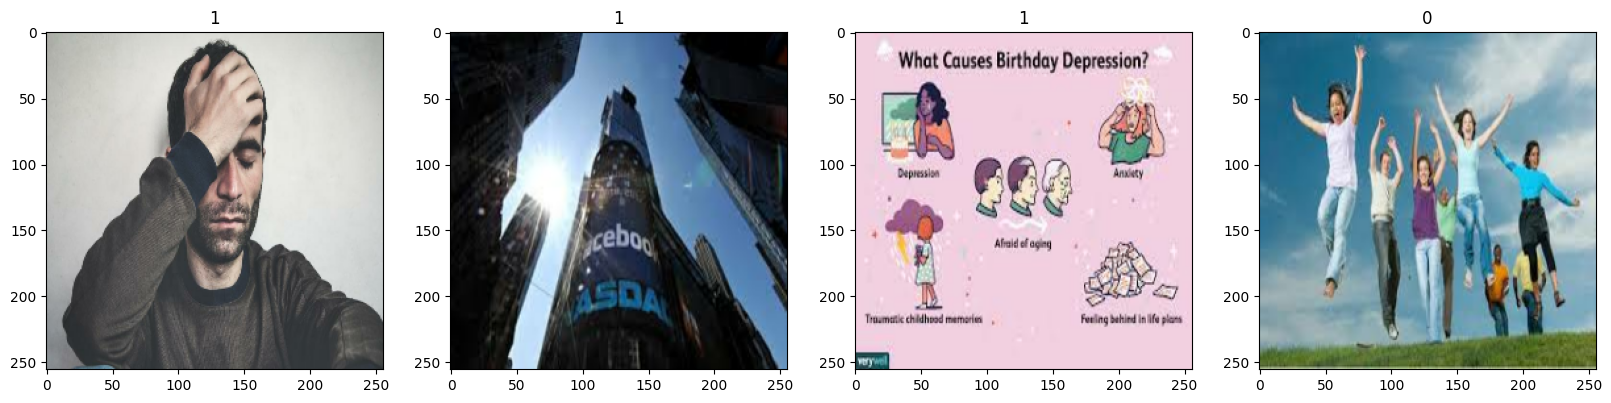

In [23]:
fig, ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [24]:
scaled = batch[0]/255
scaled.max()

1.0

In [25]:
data = data.map(lambda x,y:(x/255,y))
scaled_iterator = data.as_numpy_iterator()
scaled_iterator.next()[0].max()

1.0

In [26]:
scaled_iterator.next()[0].max()

1.0

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).skip(val_size).take(test_size)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [33]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.FalseNegatives(),
    ],
)

In [35]:
history = model.fit(train,validation_data=val,epochs=9)

Epoch 1/9
24/24 [==============================] - 55s 2s/step - loss: 0.1241 - binary_accuracy: 0.9531 - false_negatives: 19.0000 - val_loss: 0.2596 - val_binary_accuracy: 0.9062 - val_false_negatives: 6.0000
Epoch 2/9
24/24 [==============================] - 56s 2s/step - loss: 0.1018 - binary_accuracy: 0.9701 - false_negatives: 11.0000 - val_loss: 0.6153 - val_binary_accuracy: 0.8958 - val_false_negatives: 7.0000
Epoch 3/9
24/24 [==============================] - 52s 2s/step - loss: 0.0979 - binary_accuracy: 0.9714 - false_negatives: 9.0000 - val_loss: 0.6733 - val_binary_accuracy: 0.8542 - val_false_negatives: 7.0000
Epoch 4/9
24/24 [==============================] - 54s 2s/step - loss: 0.0538 - binary_accuracy: 0.9883 - false_negatives: 4.0000 - val_loss: 0.2940 - val_binary_accuracy: 0.9167 - val_false_negatives: 4.0000
Epoch 5/9
24/24 [==============================] - 54s 2s/step - loss: 0.0356 - binary_accuracy: 0.9909 - false_negatives: 2.0000 - val_loss: 0.5613 - val_binary_

In [36]:
history.history

{'loss': [0.1240796148777008,
  0.10182216018438339,
  0.09794365614652634,
  0.05375009775161743,
  0.035601288080215454,
  0.03989097848534584,
  0.024759938940405846,
  0.04382212832570076,
  0.013969254679977894],
 'binary_accuracy': [0.953125,
  0.9700520634651184,
  0.9713541865348816,
  0.98828125,
  0.9908854365348816,
  0.9895833134651184,
  0.9908854365348816,
  0.9895833134651184,
  0.9869791865348816],
 'false_negatives': [19.0, 11.0, 9.0, 4.0, 2.0, 5.0, 2.0, 3.0, 2.0],
 'val_loss': [0.25961634516716003,
  0.6152705550193787,
  0.6733130812644958,
  0.2940351068973541,
  0.5612772703170776,
  0.10493699461221695,
  0.3512141704559326,
  -0.029815858229994774,
  0.5913550853729248],
 'val_binary_accuracy': [0.90625,
  0.8958333134651184,
  0.8541666865348816,
  0.9166666865348816,
  0.8854166865348816,
  0.9166666865348816,
  0.8958333134651184,
  0.9166666865348816,
  0.8854166865348816],
 'val_false_negatives': [6.0, 7.0, 7.0, 4.0, 7.0, 2.0, 7.0, 5.0, 10.0]}

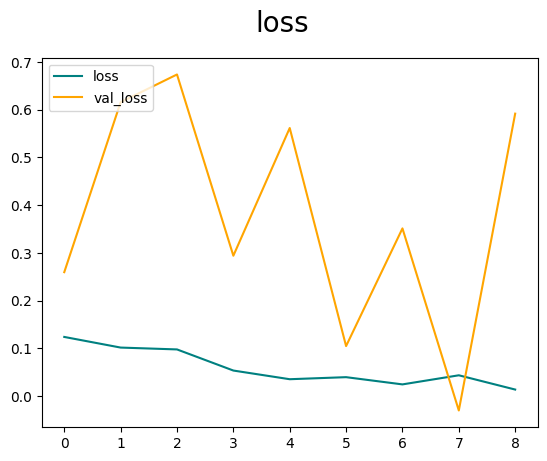

In [37]:
fig = plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

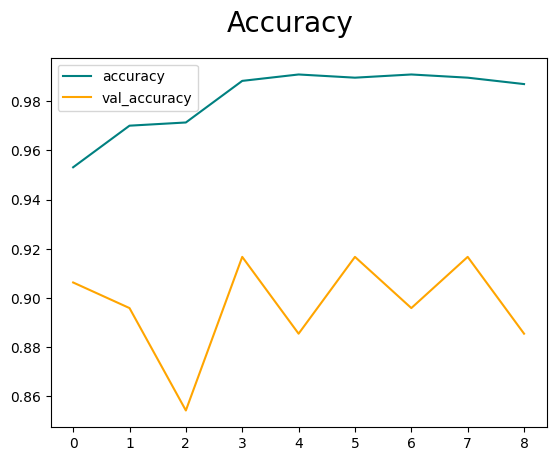

In [38]:
fig = plt.figure()
plt.plot(history.history['binary_accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_binary_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [39]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)
print(pre.result(),re.result(),acc.result())

1/1 [==============================] - 1s 837ms/step
tf.Tensor(0.953125, shape=(), dtype=float32) tf.Tensor(0.96825397, shape=(), dtype=float32) tf.Tensor(0.9479167, shape=(), dtype=float32)


array([[[161, 157, 156],
        [161, 157, 156],
        [162, 158, 157],
        ...,
        [140, 141, 139],
        [139, 140, 138],
        [136, 137, 135]],

       [[161, 157, 156],
        [161, 157, 156],
        [162, 158, 157],
        ...,
        [140, 141, 139],
        [140, 141, 139],
        [137, 138, 136]],

       [[162, 158, 157],
        [162, 158, 157],
        [163, 159, 158],
        ...,
        [141, 142, 140],
        [140, 141, 139],
        [138, 139, 137]],

       ...,

       [[187, 181, 182],
        [241, 235, 236],
        [223, 217, 218],
        ...,
        [168, 170, 170],
        [124, 126, 126],
        [ 64,  64,  64]],

       [[213, 207, 208],
        [248, 242, 243],
        [218, 212, 213],
        ...,
        [164, 166, 167],
        [127, 129, 129],
        [ 61,  61,  61]],

       [[228, 222, 223],
        [227, 221, 222],
        [228, 222, 223],
        ...,
        [152, 155, 159],
        [123, 127, 128],
        [ 66,  66,  66]]], dtype=uint8)
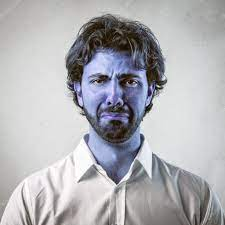

In [55]:
# img = cv2.imread('12165734.jpg')
# plt.imshow(cv2.cvtColor(img ,cv2.COLOR_BGR2RGB))
# plt.show()
img = cv2.imread(os.path.join(data_dir,'test','images1.jpg'))
img

In [43]:
# from google.colab import drive
# drive.mount('/content/drive')

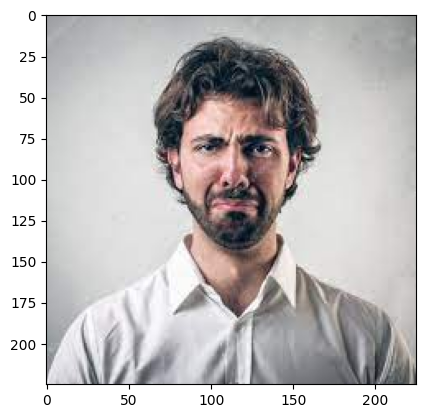

In [56]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

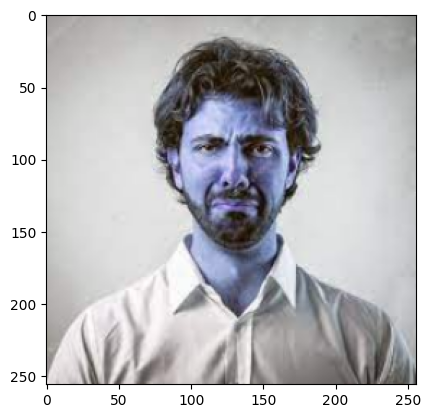

In [57]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','HappySadModel.h5'))
new_model = load_model(os.path.join('models','HappySadModel.h5'))
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 86ms/step


In [59]:
yhatnew

array([[0.9999767]], dtype=float32)

In [60]:
if yhatnew>.5:
  print('happy')
else:
  print('sad')

happy
